In [616]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [618]:
def bin_to_pattern(x):
    return [ [1-int(i), int(i)] for i in x ]
def create_specific_patterns(mode1,mode2,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats
def create_specific_patterns3(mode1,mode2,mode3,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(mode3-(mode2-mode1-1)-mode1-2) + bin_to_pattern(str(k)) + [[1,1]]*(size -mode1-(mode2-mode1-1)-(mode3-(mode2-mode1-1)-mode1-2)-3) )
    return pats
def create_specific_patterns4(mode1,mode2,mode3,mode4,size):
    pats = []
    temp_pats = create_specific_patterns3(mode1,mode2,mode3,size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode4] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def dev_pattern(pat):
    f = np.array([1])
    for i in pat:
        f = np.kron(f,i)
    return f

In [589]:
n = 8
sequence_list = np.array([np.array(list(bin(i)[3:]),dtype=np.int32) for i in range(2**n, 2**(n+1))])
len(sequence_list)

256

In [594]:
#Hidden Rules
rule1 = [0,0,0,0]
rule2 = [1,0,0,1]
reward1 = 10
reward2 = 50
def estimate_cost(sequence):
    reward = 0
    for k in range(n-3):
        if np.all(sequence[k:k+4]==rule1):
            reward += reward1
        elif np.all(sequence[k:k+4]==rule2):
            reward += reward2
    return reward

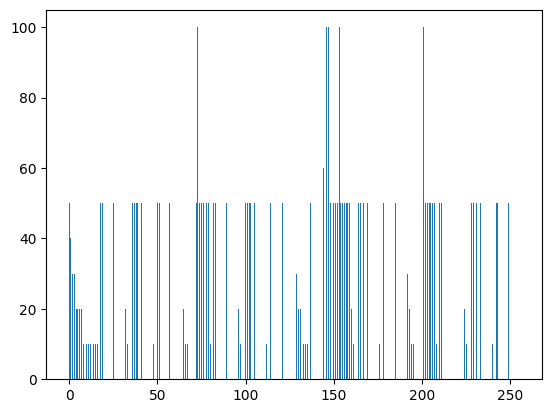

In [595]:
sequence_cost = []
for sequence in sequence_list:
    sequence_cost.append(estimate_cost(sequence))
sequence_cost = np.array(sequence_cost)

plt.bar([i for i in np.arange(len(sequence_list))],sequence_cost,width=0.5)
plt.show()
ma = np.argmax(sequence_cost)

In [598]:
best_val = sorted(range(len(sequence_cost)), key=lambda i: sequence_cost[i], reverse=True)[:5]

In [486]:
Phi = np.random.rand(100,2**n)

def run_one_round(Phi, sequence_cost_spectrum):
    y = np.array(Phi * np.matrix(sequence_cost_spectrum).T).T[0]
    y = np.matrix(y).T
    return np.argmax(Phi.T * y)

run_one_round(Phi, sequence_cost_spectrum)

29

[]


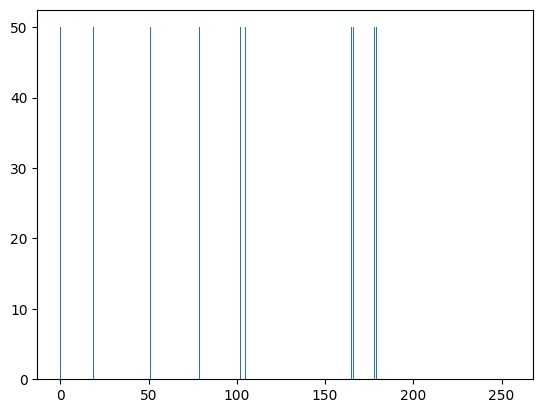

In [626]:
sample_index = np.random.randint(0, len(sequence_list)-1, size=30)
print(list(set(sample_index) & set(best_val)))

seq_sample = sequence_list[sample_index]
seq_sample_cost = sequence_cost[sample_index]

sequence_cost_spectrum = np.zeros_like(sequence_cost)
sequence_cost_spectrum[sample_index] = sequence_cost[sample_index]

thresh = np.percentile(sequence_cost,90)
sequence_cost_spectrum[sequence_cost_spectrum<thresh]=0

plt.bar(range(len(sequence_cost)), sequence_cost_spectrum,width=0.5)
plt.show()

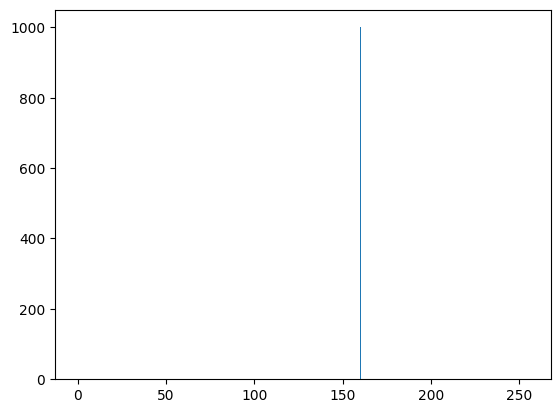

In [630]:
res_count = np.zeros_like(sequence_cost_spectrum)
for _ in range(1000):
    # Phi = np.random.randn(10, 2**n)
    all_pat = []
    for i in range(n-3):
        all_pat += create_specific_patterns4(i,i+1,i+2,i+3,n)
    Phi = np.array([dev_pattern(p) for p in all_pat])[:20,:]
    res = run_one_round(Phi, sequence_cost_spectrum)
    res_count[res] += 1

plt.bar(range(len(sequence_cost)), res_count, width=0.5)
plt.show()
res = sorted(range(len(res_count)), key=lambda i: res_count[i], reverse=True)[:5]


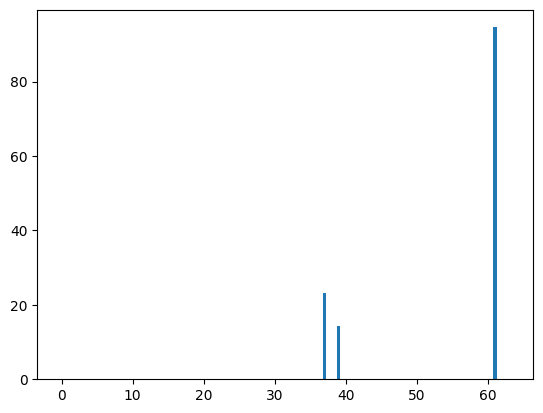

In [588]:
Phi = np.random.rand(10, 2**n)
y = np.array(Phi * np.matrix(sequence_cost_spectrum).T).T[0]

from sklearn.linear_model import OrthogonalMatchingPursuit
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=10)
omp.fit(Phi, y)
coefficients = [ i if i>0 else 0 for i in omp.coef_]

plt.bar(range(len(coefficients)), coefficients, width=0.5)
plt.show()